## Importación de librerias


In [ ]:
# Verificar si los paquetes están instalados

if (!require("DescTools")) install.packages("DescTools")
if (!require("dplyr")) install.packages("dplyr")
if (!require("tm")) install.packages("tm")
if (!require("wordcloud")) install.packages("wordcloud")
if (!require("corrplot")) install.packages("corrplot")
if (!require("ggcorrplot")) install.packages("ggcorrplot")
if (!require("gridExtra")) install.packages("gridExtra")
if (!require("stringr"))install.packages("stringr")
if (!require("forecast"))install.packages("forecast")

# Verifica si el espacio de nombres 'scales' está disponible
# Cada paquete en R tiene su propio espacio de nombres para evitar conflictos con otros paquetes que puedan tener funciones o nombres de objetos con el mismo nombre.

if (!requireNamespace("scales", quietly = TRUE)) {
  install.packages("scales")
}


In [ ]:
library(dplyr)
library(DescTools)
library(scales)
library(ggplot2)
library(readr)
library(knitr)
library(tm)
library(RColorBrewer)
library(wordcloud)
library(corrplot)
library(ggcorrplot)
library(grid)
library(gridExtra)
library(tidyr)
library(stringr)
library(tools)
library(forecast)

source("/content/kaggle/utils.R")

## Lectura de datos

In [ ]:
df <- read.csv("/content/kaggle/games.csv",header = TRUE, sep = ",", , na.strings = "")
attach(df)

In [ ]:
df_recs <- read.csv("/content/kaggle/recommendations.csv",header = TRUE, sep = ",", , na.strings = "")
attach(df_recs)

The following object is masked from df:

    app_id




## Análisis Exploratorio de Datos

### Listado de columnas

In [ ]:
# Obtener listado de los nombres de las columnas
for (name in names(df)) {
  cat(name,"\n")
}

app_id 
title 
date_release 
win 
mac 
linux 
rating 
positive_ratio 
user_reviews 
price_final 
price_original 
discount 
steam_deck 


### Muestra de datos

In [ ]:
#Mostrar las primeras 10 filas
head(df,10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,13500,Prince of Persia: Warrior Within™,2008-11-21,true,false,false,Very Positive,84,2199,9.99,9.99,0,true
2,22364,BRINK: Agents of Change,2011-08-03,true,false,false,Positive,85,21,2.99,2.99,0,true
3,113020,Monaco: What's Yours Is Mine,2013-04-24,true,true,true,Very Positive,92,3722,14.99,14.99,0,true
4,226560,Escape Dead Island,2014-11-18,true,false,false,Mixed,61,873,14.99,14.99,0,true
5,249050,Dungeon of the ENDLESS™,2014-10-27,true,true,false,Very Positive,88,8784,11.99,11.99,0,true
6,250180,METAL SLUG 3,2015-09-14,true,false,false,Very Positive,90,5579,7.99,7.99,0,true
7,253980,Enclave,2013-10-04,true,true,true,Mostly Positive,75,1608,4.99,4.99,0,true
8,271850,Men of War: Assault Squad 2 - Deluxe Edition upgrade,2014-05-16,true,false,false,Mixed,61,199,6.99,6.99,0,true
9,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,true,false,false,Very Positive,94,9686,14.99,14.99,0,true


In [ ]:
#Mostrar las ultimas 10 filas
tail(df,10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
50863,1407180,Lawgivers II,2023-08-18,true,true,true,Mostly Positive,76,121,25,0,0,true
50864,1341490,Hellsweeper VR,2023-09-21,true,false,false,Very Positive,80,94,30,0,0,true
50865,1597310,Airship: Kingdoms Adrift,2023-09-21,true,false,false,Mixed,69,242,24,0,0,true
50866,2195250,EA SPORTS FC™ 24,2023-09-28,true,false,false,Mixed,55,4473,70,0,0,true
50867,2362300,Train Sim World® 4,2023-09-26,true,false,false,Mixed,65,351,50,0,0,true
50868,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,true,false,false,Very Positive,96,101,22,0,0,true
50869,1272080,PAYDAY 3,2023-09-21,true,false,false,Mostly Negative,38,29458,40,0,0,true
50870,1402110,Eternights,2023-09-11,true,false,false,Very Positive,89,1128,30,0,0,true
50871,2272250,Forgive Me Father 2,2023-10-19,true,false,false,Very Positive,95,82,17,0,0,true


### Dimensión del DataFrame

In [ ]:
#Verificar la dimensión del DataFrame (número de filas y columnas)
dim(df)

[1] 50872    13

### Verificación de Duplicados


In [ ]:
print(paste("Número de filas duplicadas = ", sum(duplicated(df))))

[1] "Número de filas duplicadas =  0"


### Verificación de valores faltantes

In [ ]:
function_valores_nulos()

        app_id :  0 
         title :  0 
  date_release :  0 
           win :  0 
           mac :  0 
         linux :  0 
        rating :  0 
positive_ratio :  0 
  user_reviews :  0 
   price_final :  0 
price_original :  0 
      discount :  0 
    steam_deck :  0 


### Esquema de datos

In [ ]:
# La función str() muestra la estructura interna del objeto 'df',  da información sobre el tipo de datos,
# la cantidad de observaciones y variables,  así como una vista previa de los primeros valores de cada variable.
str(df)

'data.frame':	50872 obs. of  13 variables:
 $ app_id        : int  13500 22364 113020 226560 249050 250180 253980 271850 282900 19810 ...
 $ title         : chr  "Prince of Persia: Warrior Within™" "BRINK: Agents of Change" "Monaco: What's Yours Is Mine" "Escape Dead Island" ...
 $ date_release  : chr  "2008-11-21" "2011-08-03" "2013-04-24" "2014-11-18" ...
 $ win           : chr  "true" "true" "true" "true" ...
 $ mac           : chr  "false" "false" "true" "false" ...
 $ linux         : chr  "false" "false" "true" "false" ...
 $ rating        : chr  "Very Positive" "Positive" "Very Positive" "Mixed" ...
 $ positive_ratio: int  84 85 92 61 88 90 75 61 94 75 ...
 $ user_reviews  : int  2199 21 3722 873 8784 5579 1608 199 9686 33 ...
 $ price_final   : num  9.99 2.99 14.99 14.99 11.99 ...
 $ price_original: num  9.99 2.99 14.99 14.99 11.99 ...
 $ discount      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ steam_deck    : chr  "true" "true" "true" "true" ...


### Transformación del Tipo de Datos

In [ ]:
df$win <- as.logical(win)
df$mac <- as.logical(mac)
df$linux <- as.logical(linux)
df$steam_deck<- as.logical(steam_deck)
df$date_release <- as.Date(date_release, format="%Y-%m-%d")

In [ ]:
unique(rating)

[1] "Very Positive"           "Positive"               
[3] "Mixed"                   "Mostly Positive"        
[5] "Overwhelmingly Positive" "Negative"               
[7] "Mostly Negative"         "Overwhelmingly Negative"
[9] "Very Negative"

In [ ]:
# Transformar la variable rating a factor

df$rating <- case_when(
        df$rating %in% c('Positive', 'Very Positive', 'Mostly Positive', 'Overwhelmingly Positive') ~ 'positive',
        df$rating %in% c('Negative','Mostly Negative', 'Overwhelmingly Negative', 'Very Negative') ~ 'negative',
        df$rating == 'Mixed' ~ 'neutro',
        TRUE ~ df$rating
)

df$rating <- factor(ifelse(is.na(df$rating), "neutro", df$rating), levels = c("positive", "neutro", "negative"))

In [ ]:
# Transformar la variable price_final a factor

df$price_cat <- cut(df$price_final, breaks = quantile(df$price_final, probs = c(0, 0.25, 0.5, 0.75, 1)),
                    labels = c("bajo", "medio", "medio", "alto"), include.lowest = TRUE)

df$price_cat <- factor(df$price_cat, levels = c("bajo", "medio", "alto"))

In [ ]:
str(df)

'data.frame':	50872 obs. of  14 variables:
 $ app_id        : int  13500 22364 113020 226560 249050 250180 253980 271850 282900 19810 ...
 $ title         : chr  "Prince of Persia: Warrior Within™" "BRINK: Agents of Change" "Monaco: What's Yours Is Mine" "Escape Dead Island" ...
 $ date_release  : Date, format: "2008-11-21" "2011-08-03" ...
 $ win           : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ mac           : logi  FALSE FALSE TRUE FALSE TRUE FALSE ...
 $ linux         : logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ rating        : Factor w/ 3 levels "positive","neutro",..: 1 1 1 2 1 1 1 2 1 1 ...
 $ positive_ratio: int  84 85 92 61 88 90 75 61 94 75 ...
 $ user_reviews  : int  2199 21 3722 873 8784 5579 1608 199 9686 33 ...
 $ price_final   : num  9.99 2.99 14.99 14.99 11.99 ...
 $ price_original: num  9.99 2.99 14.99 14.99 11.99 ...
 $ discount      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ steam_deck    : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ price_cat     : Factor w/ 3 level

### Estadísticas

In [ ]:
# Seleccion de variables numéricas del dataframe
df_numericas <- df[, sapply(df, is.numeric)]

In [ ]:
df_numericas <- df_numericas[, -which(names(df_numericas) == "app_id")]

In [ ]:
# Estadísticas para las variables numéricas
estadisticas <- sapply(df_numericas, function(x) {
  c(Media = mean(x, na.rm = TRUE),
    Varianza = var(x, na.rm = TRUE),
    Desviacion_Estandar = sd(x, na.rm = TRUE),
    Maximo = max(x, na.rm = TRUE),
    Minimo = min(x, na.rm = TRUE),
    Mediana = median(x, na.rm = TRUE),
    Cuartil = quantile(x, na.rm = TRUE, probs = c(0.25, 0.5, 0.75)))
})

# Imprimir las estadísticas
print(estadisticas)

                    positive_ratio user_reviews price_final price_original
Media                     77.05203 1.824425e+03    8.620325       8.726788
Varianza                 333.19363 1.605887e+09  132.575973     132.411537
Desviacion_Estandar       18.25359 4.007352e+04   11.514164      11.507021
Maximo                   100.00000 7.494460e+06  299.990000     299.990000
Minimo                     0.00000 1.000000e+01    0.000000       0.000000
Mediana                   81.00000 4.900000e+01    4.990000       4.990000
Cuartil.25%               67.00000 1.900000e+01    0.990000       0.990000
Cuartil.50%               81.00000 4.900000e+01    4.990000       4.990000
Cuartil.75%               91.00000 2.060000e+02   10.990000      11.990000
                      discount
Media                 5.592212
Varianza            346.208516
Desviacion_Estandar  18.606679
Maximo               90.000000
Minimo                0.000000
Mediana               0.000000
Cuartil.25%           0.000000
Cu

<details>
<summary> Información por Variable </summary>

- Positive Ratio </r>
Media: En promedio, el ratio positivo es de 77.05%. <br>
Varianza: La varianza es de 333.19, lo que indica que hay una gran variabilidad considerable en los ratios de comentarios positivos entre diferentes elementos.
La varianza nos indica la dispersión de los datos alrededor de la media, pero no nos dice la dirección de esa dispersión. <br>
Desviación Estándar: Los ratios positivos se desvían un 18 de la media. Esto nos da una idea de la dispersión de los ratios positivos alrededor de su media  (por encima o por debajo). <br>
Máximo y Mínimo: El ratio positivo varía de 0% hasta 100%. <br>
Cuartiles:<br>
El primer cuartil (Q1) significa que el 25% de los datos tienen un ratio de comentarios positivos igual o inferior a 67.<br>
El segundo cuartil (Q2 = Mediana), indica que el 50% de los datos tienen un ratio de comentarios positivos igual o inferior a 81.<br>
El tercer cuartil (Q3) indica que el 75% de los datos tienen un ratio de comentarios positivos igual o inferior a 91.<br>

- User Reviews <br>
Media: En promedio, hay alrededor de 1824 reseñas de usuarios.<br>
Varianza: Es de alrededor de 1605'887'000 lo que indica una gran variabilidad alrededor de la media dado que el valor es muy alto.<br>
Desviación Estándar: Es de aproximadamente 40073 lo que indica que los datos están más dispersos alrededor de la media.<br>
Máximo y Mínimo: El valor máximo observado en la variable user_reviews es de aproximadamente 7494460 y el valor mínimo es de 10. <br>
Existe una gran variabilidad en la cantidad de reseñas de los usuarios para los videojuegos en la plataforma donde la presencia de videojuegos populares hace que se genere una gran cantidad de reseñas en comparación con otros que pueden ser menos conocidos y no haber generado suficiente interés entre los usuarios.
El primer cuartil (Q1) significa que el 25% los juegos tienen 19 reseñas o menos.
El segundo cuartil (Q2 = Mediana), indica que el 50% de las reseñas tienen un valor igual o inferior a 49.
El tercer cuartil (Q3) indica que el 75% de los juegos tienen 206 reseñas o menos.

- Price Final <br>
Media: En promedio, el precio final de los videojuegos es de \$8.62 <br>
Varianza: La varianza del precio final es de 132.58 lo que indica que existe una gran variabilidad alrededor de la media (las unidades de la variable están elevadas al cuadrado) .<br>
Desviación Estándar: La desviación estándar del precio final es de \$11.51 este valor confirma la alta variabilidad en los precios finales (La Desviación Estándar está en la misma escala que los datos originales).<br>
Máximo y Mínimo: El valor máximo observado en la variable es de \$299.99. aproximadamente y el valor mínimo es de \$0. La presencia de valores extremos (juegos gratuitos y juegos con precios muy altos) puede ser un indicio de precios atípicos que podrían estar sesgando la media.<br>
El primer cuartil (Q1) significa que el 25% los videojuegos tienen un precio de  \$0.99  o menos.<br>
El segundo cuartil (Q2 = Mediana), indica que el 50% de los videojuegos tienen un valor igual o inferior a \$4.99.<br>
El tercer cuartil (Q3) indica que el 75% de los videojuegos tienen un precio de \$10.99 o menos. <br>

- Discount <br>
Media: La media del porcentaje de descuento es de 5.59 lo que significa que en promedio los descuentos aplicados a los videojuegos es de 5.59%.<br>
Varianza: La varianza es de 346.21 lo que indica que existe una gran variabilidad alrededor de la media (las unidades de la variable están elevadas al cuadrado).<br>
Desviación Estándar: La desviación estándar es de 18.61 este valor confirma la alta variabilidad en los descuentos (La Desviación Estándar está en la misma escala que los datos originales).<br>
Máximo y Mínimo: El valor máximo observado en la variable descuento es del 90% y el valor mínimo es de 0%. <br>
El primer cuartil (Q1) significa que el 25% los videojuegos tienen un descuento del 0%.<br>
El segundo cuartil (Q2 = Mediana), indica que el 50% de los videojuegos tienen un descuento del 0%.<br>
El tercer cuartil (Q3) indica que el 75% de los videojuegos tienen un descuento de 0%. <br> La mayoria de videojuegos no presentan descuentos por lo que los valores más frecuentes están en el extremo inferior y además existen valores altos que son poco comunes lo que indica una distribución sesgada a la derecha.
</details>

#### Moda

In [ ]:
es_no_numerica <- function(x) {
  is.character(x) | is.factor(x)
}

df_no_numericas <- df %>%
  select_if(es_no_numerica)

var_no_numericas <- names(subset(df_no_numericas, select = -app_id))


for (var in var_no_numericas) {

  moda <- DescTools::Mode(df[[var]])


  cat("Variable:", var, "\n")
  cat("Moda:", paste(moda, collapse = ", "), "\n\n")
}

Variable: title 
Moda: Loop 

Variable: rating 
Moda: positive 

Variable: price_cat 
Moda: medio 



- Para la variable title, la moda es "Loop", lo que significa que "Loop" es el valor que aparece con mayor frecuencia en los videojuegos.

- Para la variable rating, la moda es "Positive", lo que indica que la categoría "Positive" es la calificación más común asignada a los videojuegos.

- Para la variable price_cat, la moda es "medio", lo que indica que el precio medio es el valor más común en los videojuegos.



### Gráficas

#### Histogramas


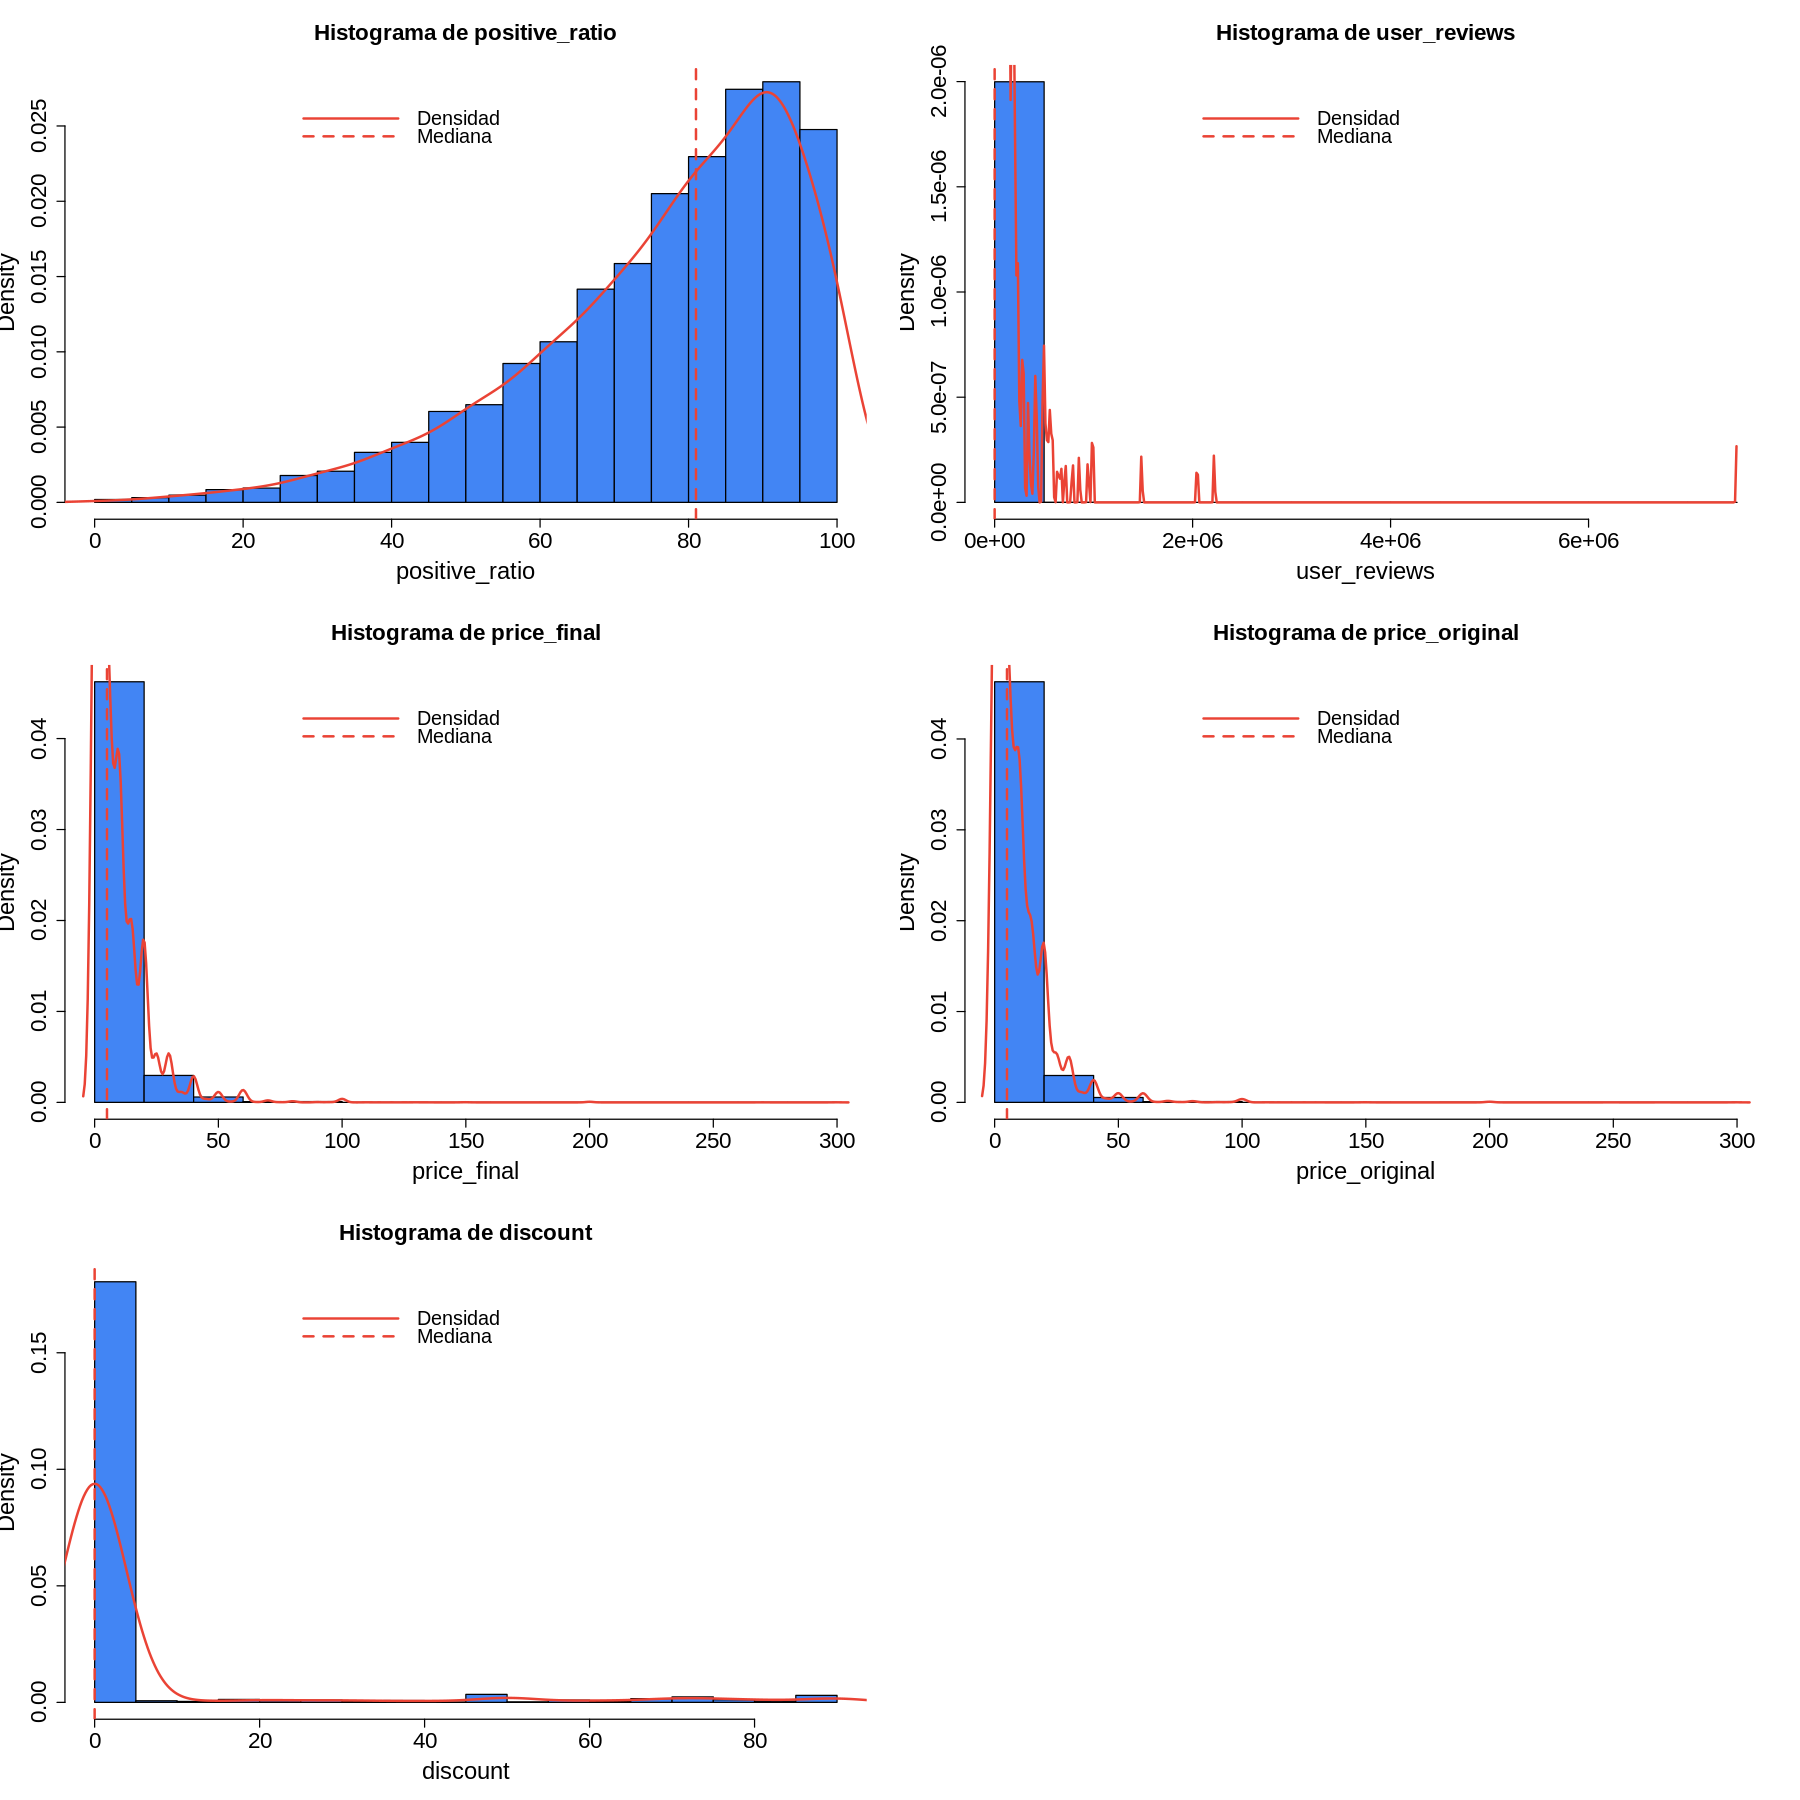

In [ ]:
# Obtener nombres de las variables numéricas
graficar_histograma(names(df_numericas))

- La mediana representa el valor central o punto medio de la distribución, es decir, el punto que divide a la distribución en dos partes iguales, esta línea nos da una idea de dónde están más concentrados los datos (tendencia central).

#### Diagrama de Cajas

###### Ratio Valoraciones Positivas

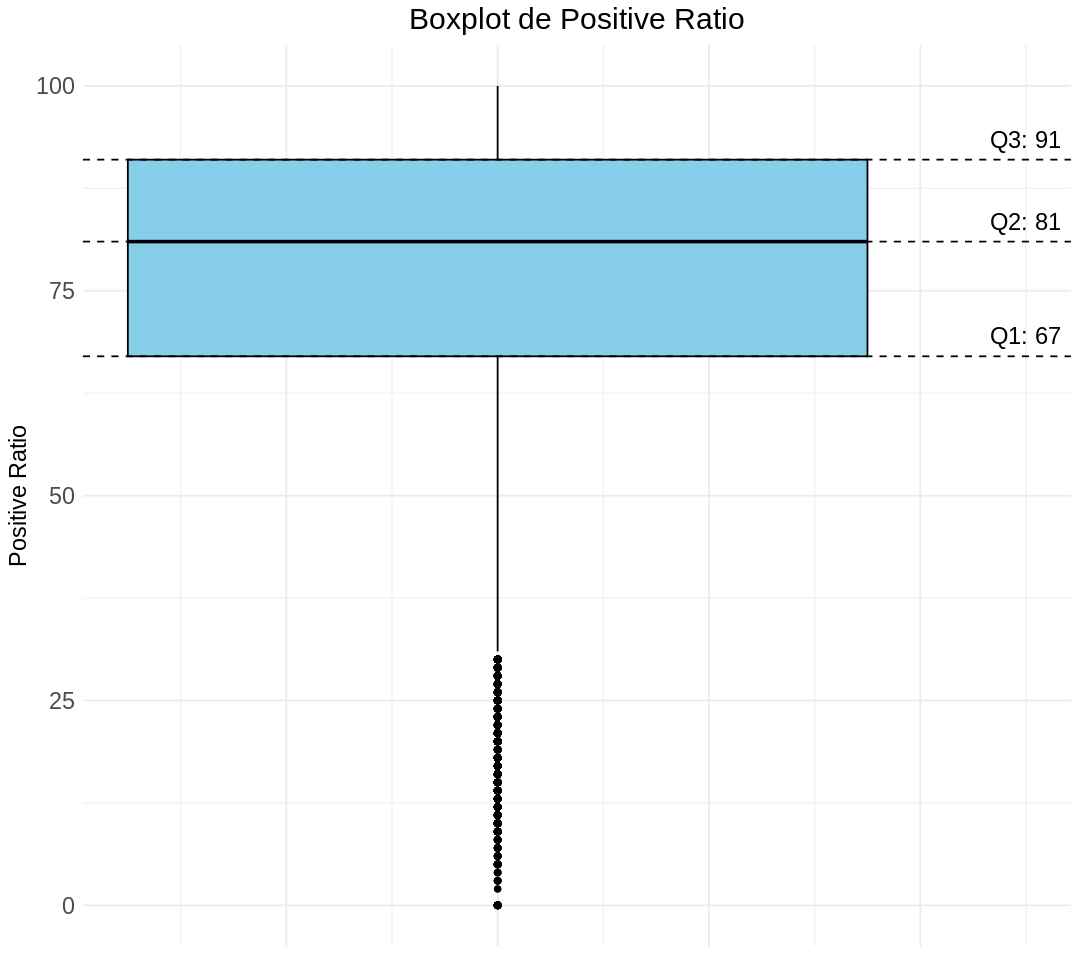

In [ ]:
graficar_boxplot(positive_ratio)

- El bigote inferior es más largo que el superior y la distancia entre la mediana y el primer cuartil (Q1) es mayor que la distancia entre la mediana y el tercer cuartil (Q3), esto indica que la distribución tiene un sesgo hacia la izquierda.

- La mediana está más cercana al tercer cuartil (Q3), esto indica que hay una mayor concentración de datos en la parte superior de la distribución, hacia el lado derecho de la distribución.

- Existe una mayor cantidad de valores más bajos de ratios de comentarios positivos en comparación con los valores más altos.

In [ ]:
hallar_outliers(positive_ratio)

Cantidad de Outliers: 1163 
Cantidad de Outliers por encima del límite superior:  0 
Cantidad de Outliers por debajo del límite inferior:  1163 



- No hay valores atípicos por encima del límite superior.
- Todos los outliers (valores atípicos) están por debajo del límite inferior.
- Existen más valores atípicos por debajo del límite inferior que por encima del límite superior, se podría indicar una asimetría hacia la izquierda en la distribución de los datos.


###### Precio Final

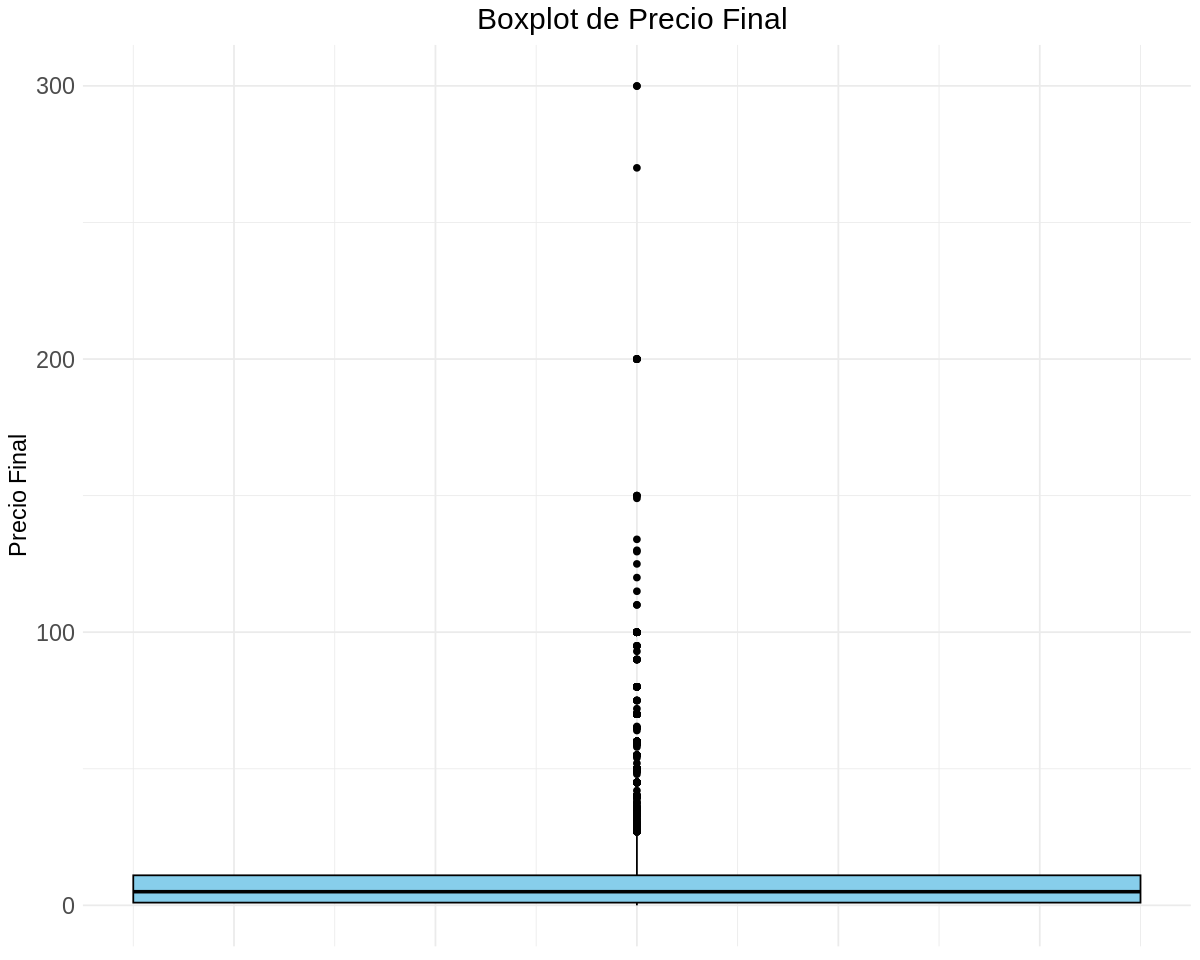

In [ ]:
# creación del boxplot
options(repr.plot.width=10, repr.plot.height=8)

ggplot(df %>% na.omit(price_final), aes(y = price_final)) +  # Handle missing values
  geom_boxplot(fill = "skyblue", color = "black", width = 5)  +
  labs(title = "Boxplot de Precio Final ", y = "Precio Final") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 18),
    axis.text.y = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_blank(),
    axis.title.x = element_blank()
  )

- El bigote superior es más largo que el inferior y la distancia entre la mediana y el tercer cuartil (Q3) es mayor que la distancia entre la mediana y el primer cuartil (Q1), esto indica que la distribución tiene un sesgo hacia la derecha.

- La mediana está más cercana al tercer cuartil (Q1), esto indica que hay una mayor concentración de datos en la parte inferior de la distribución, hacia el lado izquierdo de la distribución.

In [ ]:
hallar_outliers(price_final)

Cantidad de Outliers: 2714 
Cantidad de Outliers por encima del límite superior:  2714 
Cantidad de Outliers por debajo del límite inferior:  0 



- Todos los outliers (valores atípicos) están por encima del límite superior.
- No hay valores atípicos por debajo del límite inferior.
- Existen más valores atípicos por encima del límite superior que por debajo del límite inferior, se podría indicar una asimetría hacia la derecha en la distribución de los datos.

###### Reviews de Usuarios

In [ ]:
hallar_outliers(user_reviews)

Cantidad de Outliers: 8067 
Cantidad de Outliers por encima del límite superior:  8067 
Cantidad de Outliers por debajo del límite inferior:  0 



- Todos los outliers (valores atípicos) están por encima del límite superior.
- No hay valores atípicos por debajo del límite inferior.
- Existen más valores atípicos por encima del límite superior que por debajo del límite inferior, se podría indicar una asimetría hacia la derecha en la distribución de los datos.

###### Relación Categoría de Precios y Ratio Valoración Positiva

In [ ]:
# Calculo de la mediana de positive_ratio para cada categoría de price_cat
df_medianas <- df %>%
  group_by(price_cat) %>%
  summarise(mediana = median(positive_ratio))

# Imprime el dataframe con las medianas calculadas
kable(df_medianas, caption = "Mediana por categoría")



Table: Mediana por categoría

|price_cat | mediana|
|:---------|-------:|
|bajo      |      80|
|medio     |      82|
|alto      |      81|

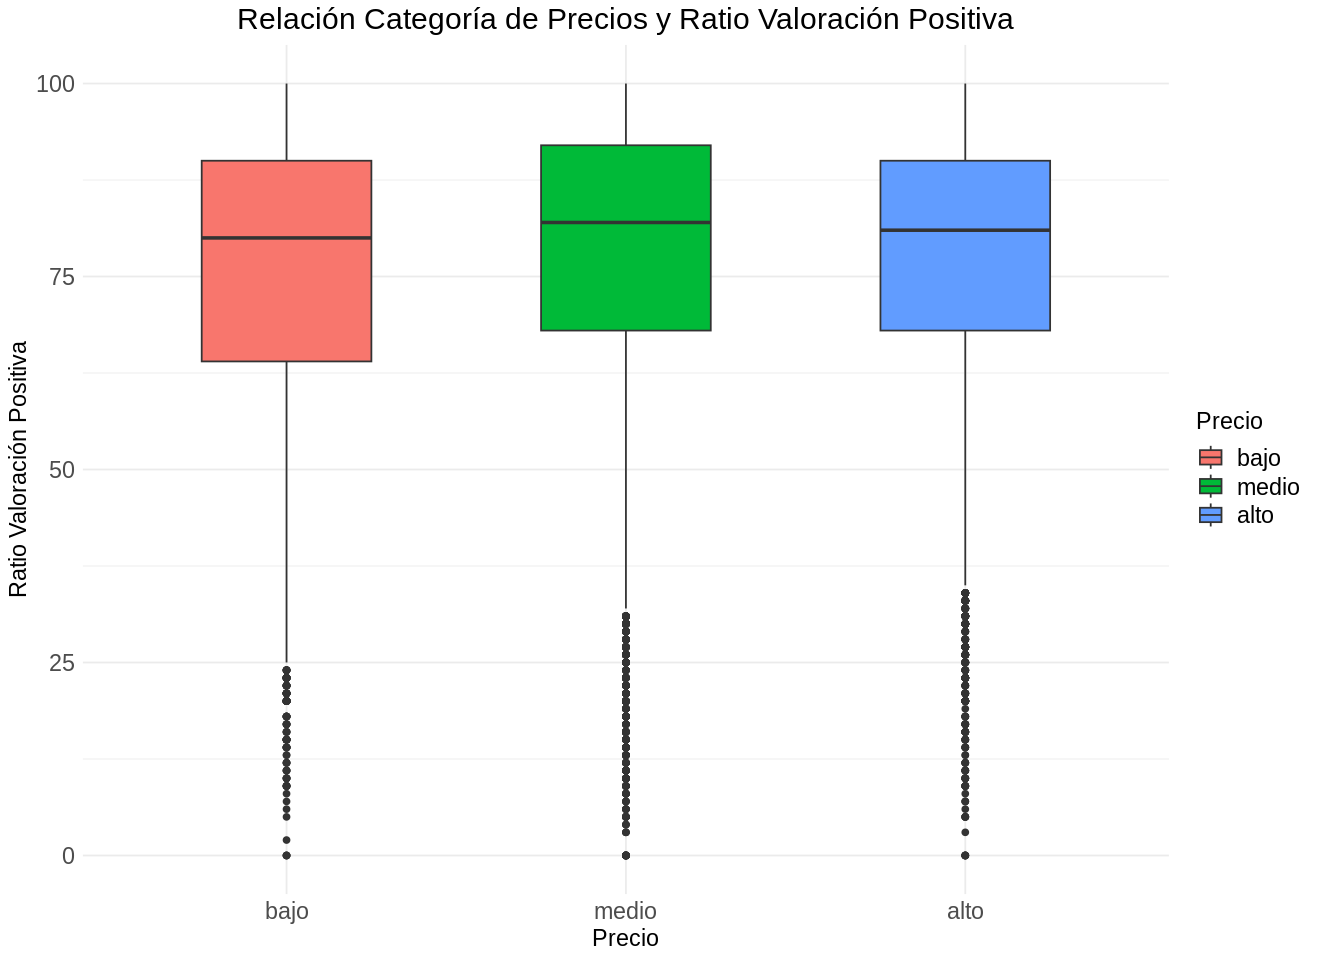

In [ ]:
# Gráfico de cajas
options(repr.plot.width=11, repr.plot.height=8)

ggplot(df, aes(x = price_cat, y = positive_ratio, fill=price_cat)) +
  geom_boxplot(width = 0.5) +
  labs(title = "Relación Categoría de Precios y Ratio Valoración Positiva",
       x = "Precio",
       y = "Ratio Valoración Positiva",
       fill = "Precio") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 18),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14), # Tamaño del título de la leyenda
        legend.text = element_text(size = 14))   # Tamaño de la leyenda)

- Se aprecia un sesgo hacia la izquierda para cada categoría de precio (bajo, medio, alto) puesto que el bigote inferior es más largo que el superior y la distancia entre la mediana y Q1 es mayor que la distancia entre la mediana y el Q3.

- Se visualiza que los valores de las medianas aumenta a medida que aumenta el precio de los juegos (bajo - medio). La categoria media del precio es la que tiene la mayor mediana y una mejor valoración positiva.

- Categoria Baja: El 50% de los juegos con precios bajos tienen un ratio de valoración positiva menor o igual a 80.

- Categoria  Media: El 50% de los juegos con precios medios tienen un ratio de valoración positiva menor o igual a 82.

- Categoria Alta: El 50% de los juegos con precios altos tienen un ratio de valoración positiva menor o igual a 81.


#### Diagrama de Barras

###### Plataformas(Windows, Linux y Mac)

In [ ]:
####  Tabla de frecuencia

lista <- lista_plataformas()
variables <- c(names(lista))

for (variable in variables) {
  cat(paste("Tabla de Frecuencia para la variable '", variable, "':", sep = ""))
  print(lista[[variable]])
  cat("\n")
}

Tabla de Frecuencia para la variable 'win':
FALSE  TRUE 
  796 50076 

Tabla de Frecuencia para la variable 'mac':
FALSE  TRUE 
37854 13018 

Tabla de Frecuencia para la variable 'linux':
FALSE  TRUE 
41831  9041 



- La tabla de frecuencia para la variable win indica la cantidad que los juegos  son en su mayoria compatibles con Windows.
Para las variables mac y linux, también podemos observar la distribución de los juegos que son compatibles con Mac y Linux, respectivamente.
Estas tablas de frecuencia nos ayudan a comprender la distribución de los juegos en función de su compatibilidad con diferentes sistemas operativos.


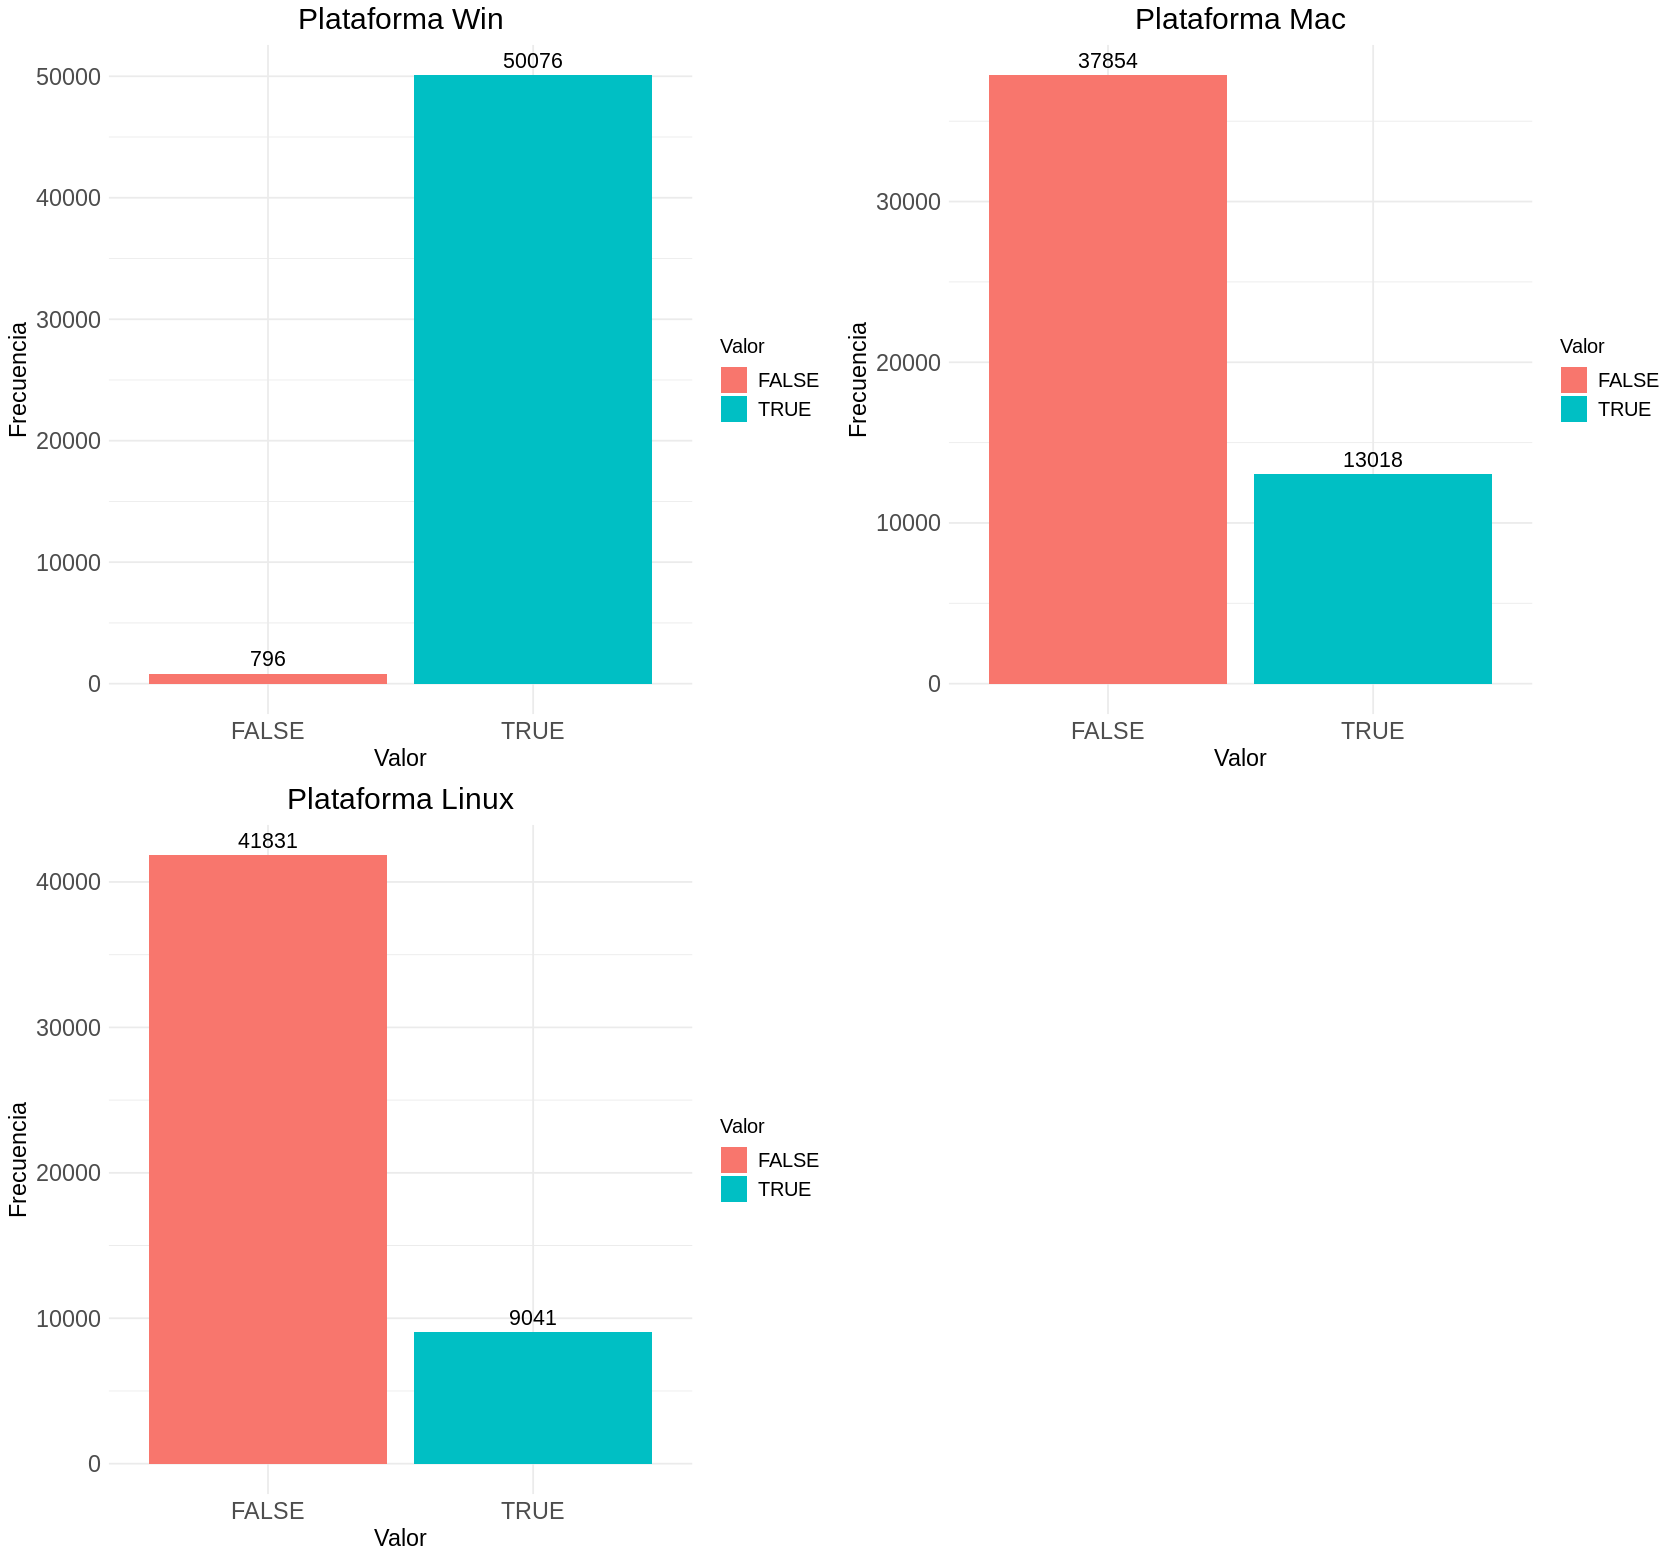

In [ ]:
graficar_barras_plataformas()

###### Rating

In [ ]:
# Obtener la tabla de frecuencias
freq_table <- table(df$rating)

# Imprimir cada categoría y su frecuencia
for (categoria in names(freq_table)) {
  cat(sprintf("%-11s: %7d\n", categoria, freq_table[categoria]))
}

positive   :   36489
neutro     :   12157
negative   :    2226


In [ ]:
rating_sorted <- reorder(df$rating,
                         # Ordenando los niveles según la frecuencia de aparición
                         as.numeric(df$rating),
                         FUN = function(x) -length(x))


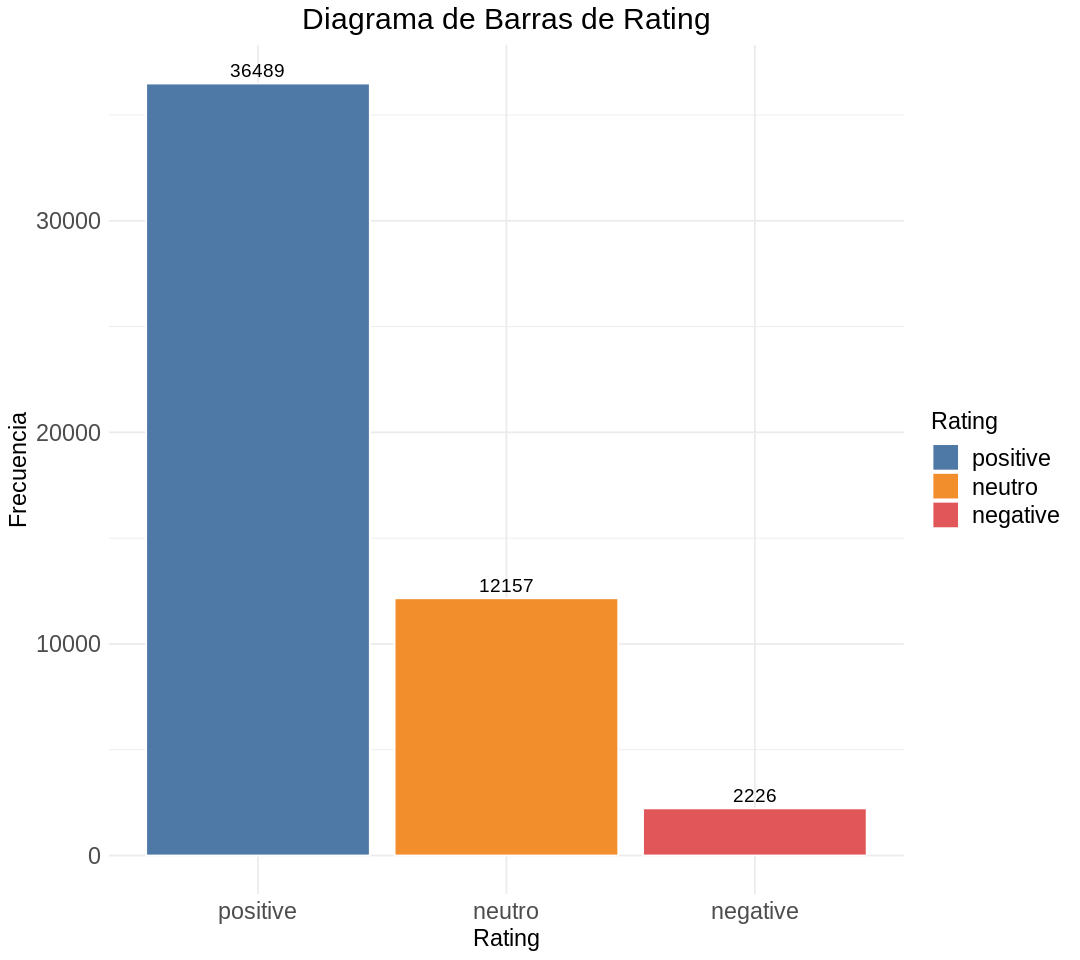

In [ ]:
graficar_factor(rating_sorted, "Rating")

###### Ratio Valoraciones Positivas



- El beneficio de categorizar la variable "positive_ratio" es que se puede analizar la distribución en los diferentes rangos o intervalos

In [ ]:
# Discretizar la variable positive_ratio
ratio_grupos <- cut(positive_ratio, breaks = c(0, 25, 50, 75, 100), labels = c("0%-25%", "25%-50%", "50%-75%", "75%-100%"), include.lowest = TRUE)

# Obtener la tabla de frecuencia
table(ratio_grupos)

ratio_grupos
  0%-25%  25%-50%  50%-75% 75%-100% 
     709     4375    14347    31441 

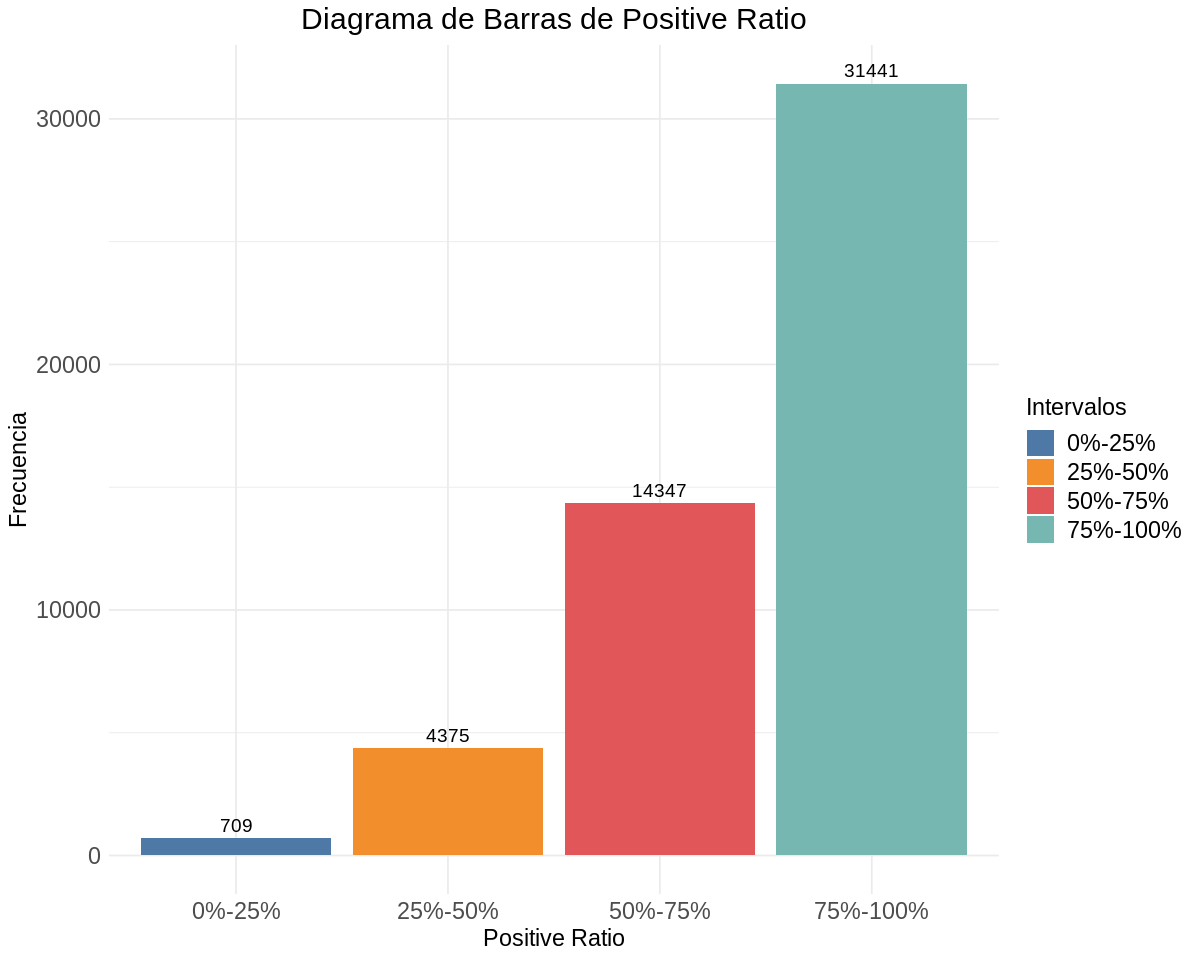

In [ ]:
graficar_factor_intervalos(ratio_grupos,"Positive Ratio")

In [ ]:
cat("Suma de los 2 primeros grupos (0%-50%):  ",sum(as.numeric(table(ratio_grupos)[1:2])),"\n")
cat("Suma de los 2 últimos grupos: (50%-100%)" ,sum(as.numeric(table(ratio_grupos)[3:4])))

Suma de los 2 primeros grupos (0%-50%):   5084 
Suma de los 2 últimos grupos: (50%-100%) 45788

Los grupos (50%-75% y 75%-100%) son los que tienen asociados mayor frecuencia
y se puede decir que es común encontrar valoraciones positivas superiores al 50% en el conjunto de datos

###### Reviews de Usuarios

In [ ]:
# Discretizar la variable user_reviews (intervalos)
reviews_grupos <- cut(user_reviews, breaks = c(0,100,1000,10000,100000,8000000),labels = c("0-100", "100-1000", "1000-10000", "10000-100000","100000-8M"), include.lowest = TRUE)

# Obtener la tabla de frecuencia
table(reviews_grupos)

reviews_grupos
       0-100     100-1000   1000-10000 10000-100000    100000-8M 
       32698        12862         4164         1011          137 

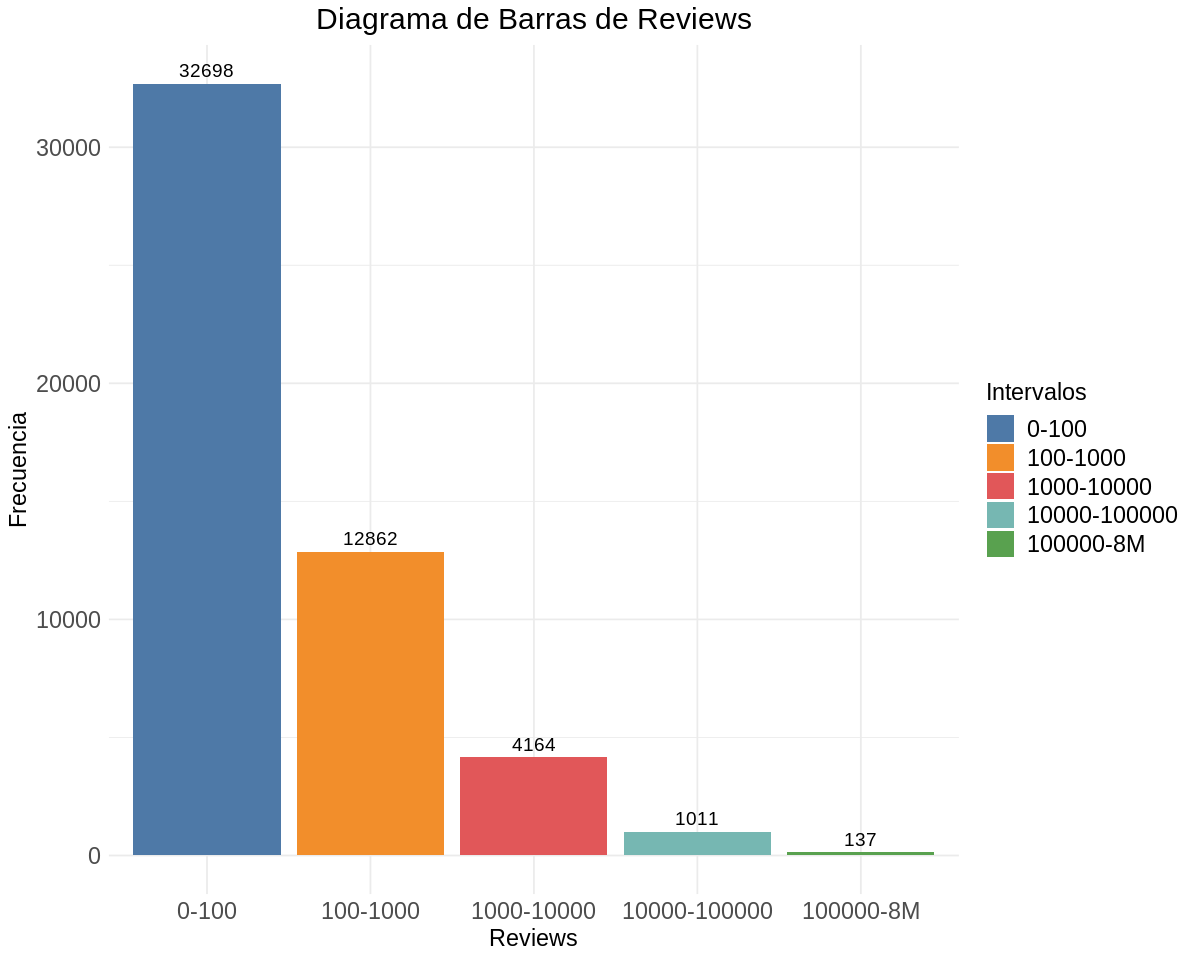

In [ ]:
graficar_factor_intervalos(reviews_grupos,"Reviews")

El diagrama de barras permite visualizar las distribuciones de las cantidades de reseñas de usuarios por intervalos en nuestro conjunto de datos. Existe una cantidad significativa de juegos que poseen reseñas en el rango de 0 a 100 y hay muy pocos juegos con un gran número de reseñas de usuarios (más de 10000).

###### Precio Final

In [ ]:
# Discretizar la variable price_final (intervalos)
price_grupos <- cut(price_final, breaks = c(0, 10, 25, 50, 75, 100, 300),labels = c("0-10", "10-25", "25-50", "50-75","75-100","100-300"), include.lowest = TRUE)

# Obtener la tabla de frecuencia
table(price_grupos)

price_grupos
   0-10   10-25   25-50   50-75  75-100 100-300 
  37860   10295    2220     353     116      28 

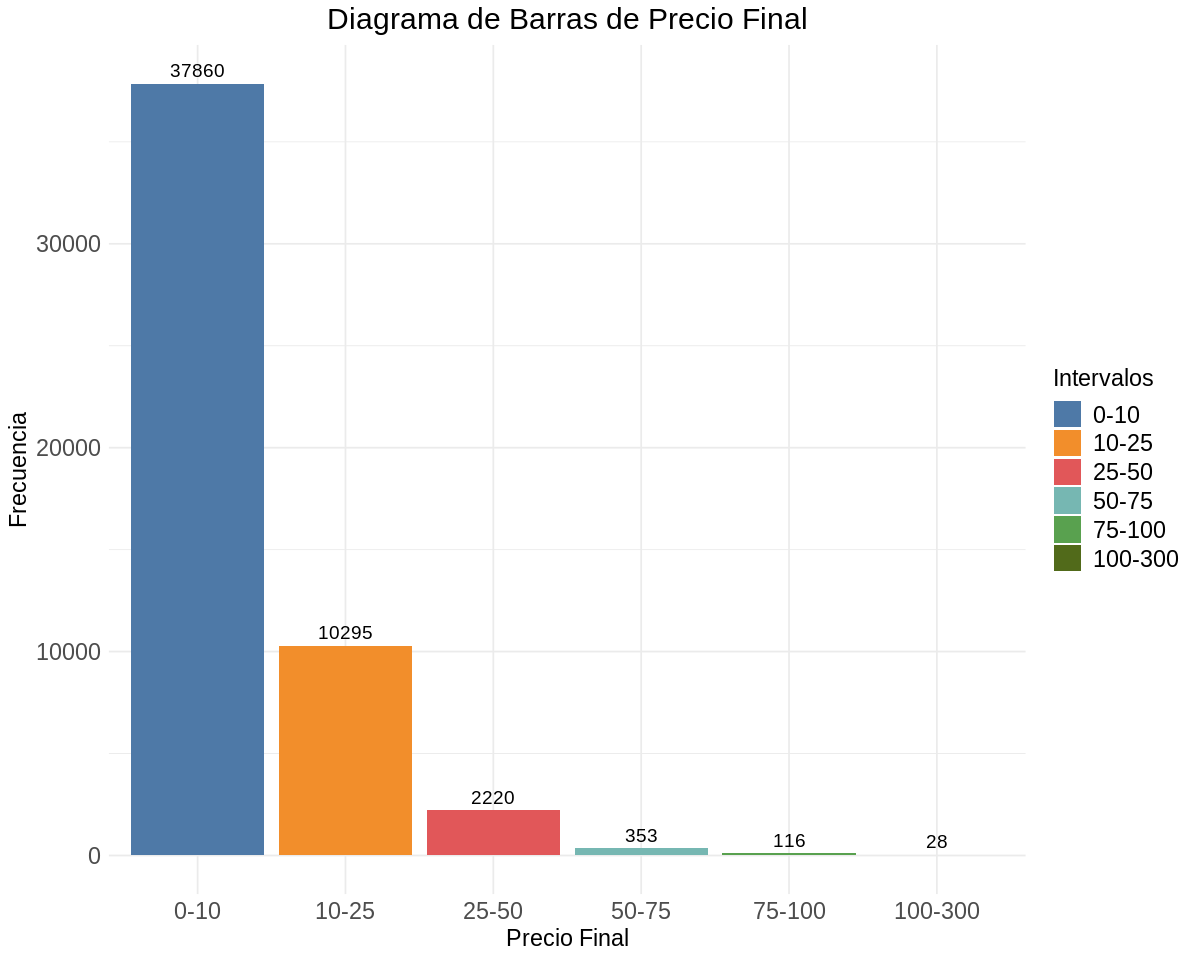

In [ ]:
graficar_factor_intervalos(price_grupos,"Precio Final")

-  La mayoría de los juegos tienen precios bajos (0-10), y existe una disminución en la cantidad de juegos a medida que aumenta el precio.
- Se puede indicar que existen juegos con precios más altos que pueden ser más exclusivos y/o especializados.

###### Distribución de Juegos por Categoria de Precio

In [ ]:
# Obtener la tabla de frecuencias
freq_table_price <- table(df$price_cat)

# Imprimir cada categoría y su frecuencia
for (categoria in names(freq_table_price)) {
  cat(sprintf("%-11s: %7d\n", categoria, freq_table_price[categoria]))
}

bajo       :   13459
medio      :   24710
alto       :   12703


In [ ]:
price_cat_sorted <- factor(df$price_cat, levels = names(sort(table(df$price_cat), decreasing = TRUE)))

In [ ]:
price_cat_sorted <- reorder(df$price_cat,
                         # Ordenando los niveles según la frecuencia de aparición
                         as.numeric(df$price_cat),
                         FUN = function(x) -length(x))


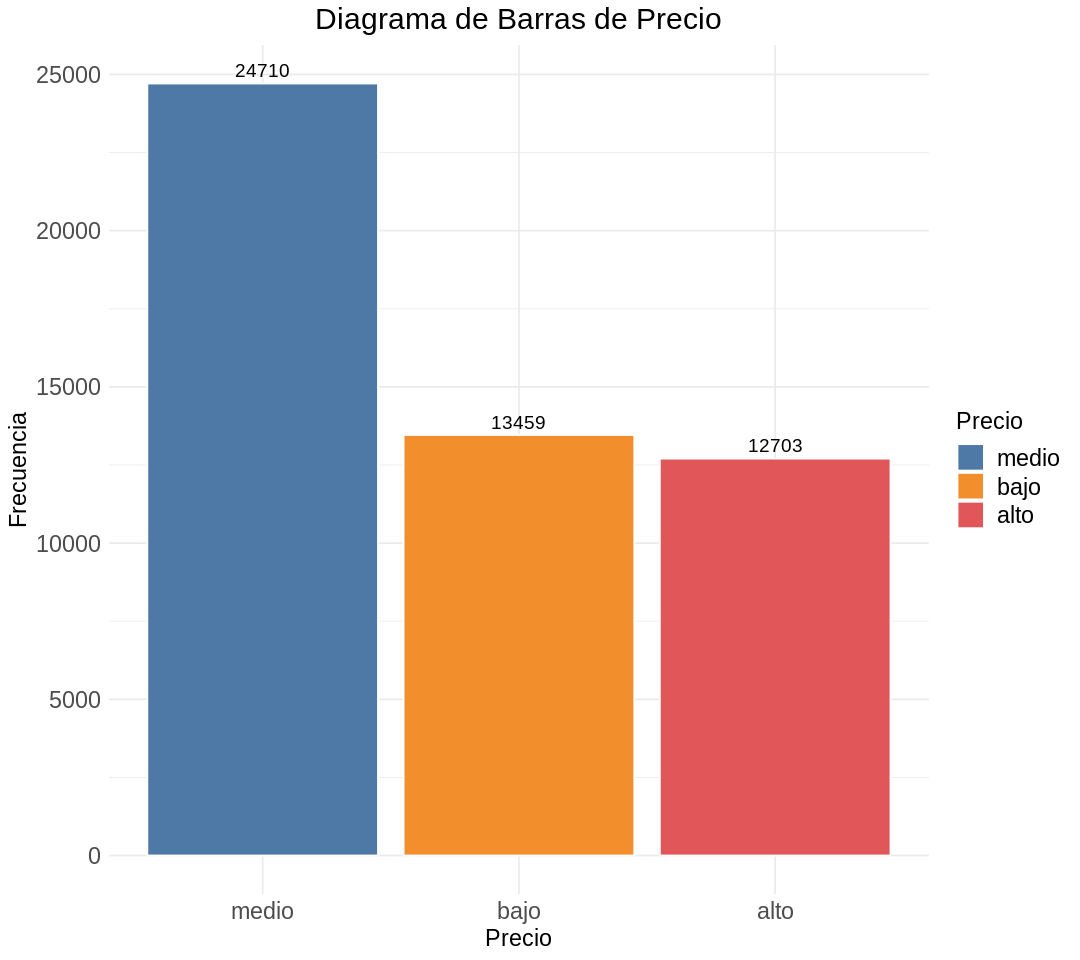

In [ ]:
graficar_factor(price_cat_sorted,"Precio")

#### Diagrama de Sectores

###### Plataformas(Windows, Linux y Mac)

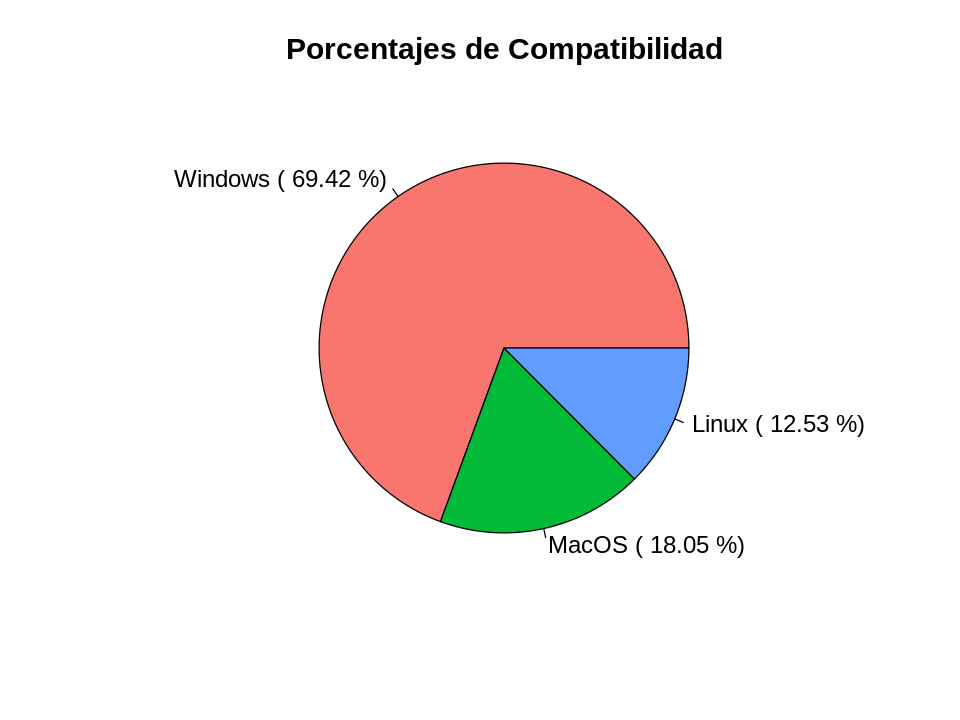

In [ ]:
graficar_pie_compatibilidad()

####  Serie de Tiempo

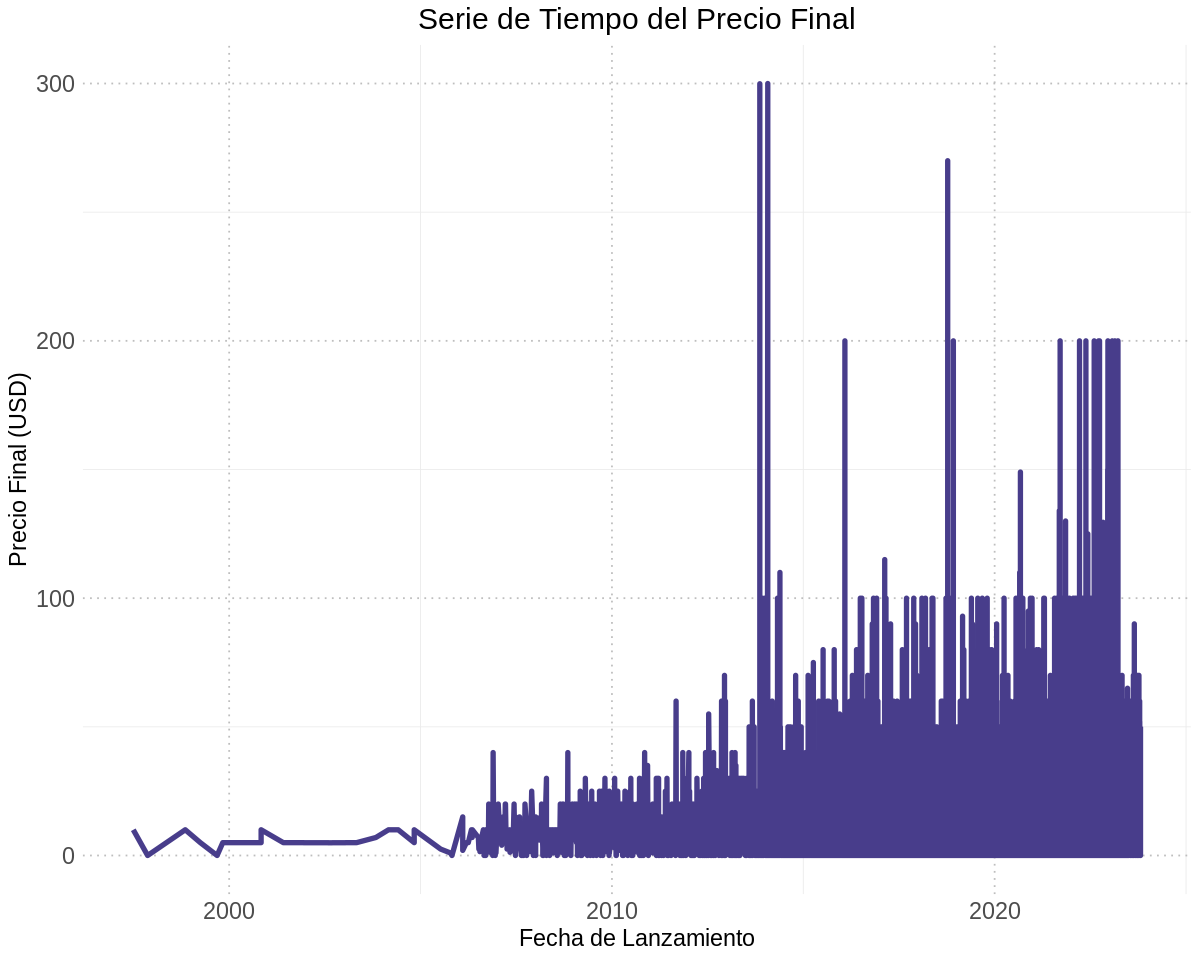

In [ ]:
# Gráfico de serie de tiempo
options(repr.plot.width=10, repr.plot.height=8)

ggplot(df, aes(x = date_release, y = price_final)) +
  geom_line(color = "darkslateblue",linewidth = 1.5, linetype = "solid")+
  labs(title = "Serie de Tiempo del Precio Final",
       x = "Fecha de Lanzamiento",
       y = "Precio Final (USD)") +
  theme_minimal() +
  theme(
        plot.title = element_text(hjust = 0.5,  size = 18), # Alineación del título al centro
        axis.text.x = element_text(size = 14),              # Tamaño las etiquetas del eje x
        axis.text.y = element_text(size = 14),              # Tamaño del texto del eje y
        axis.title.x = element_text(size = 14),             # Tamaño de la etiqueta del eje x
        axis.title.y = element_text(size = 14),             # Tamaño de la etiqueta del eje y
        panel.grid.major = element_line(colour = "gray", linetype = "dotted"))  # Líneas de cuadrícula

- El precio final tiene un aumento constante a lo largo del tiempo con algunos picos en ciertos momentos.

####  Nube de Palabras

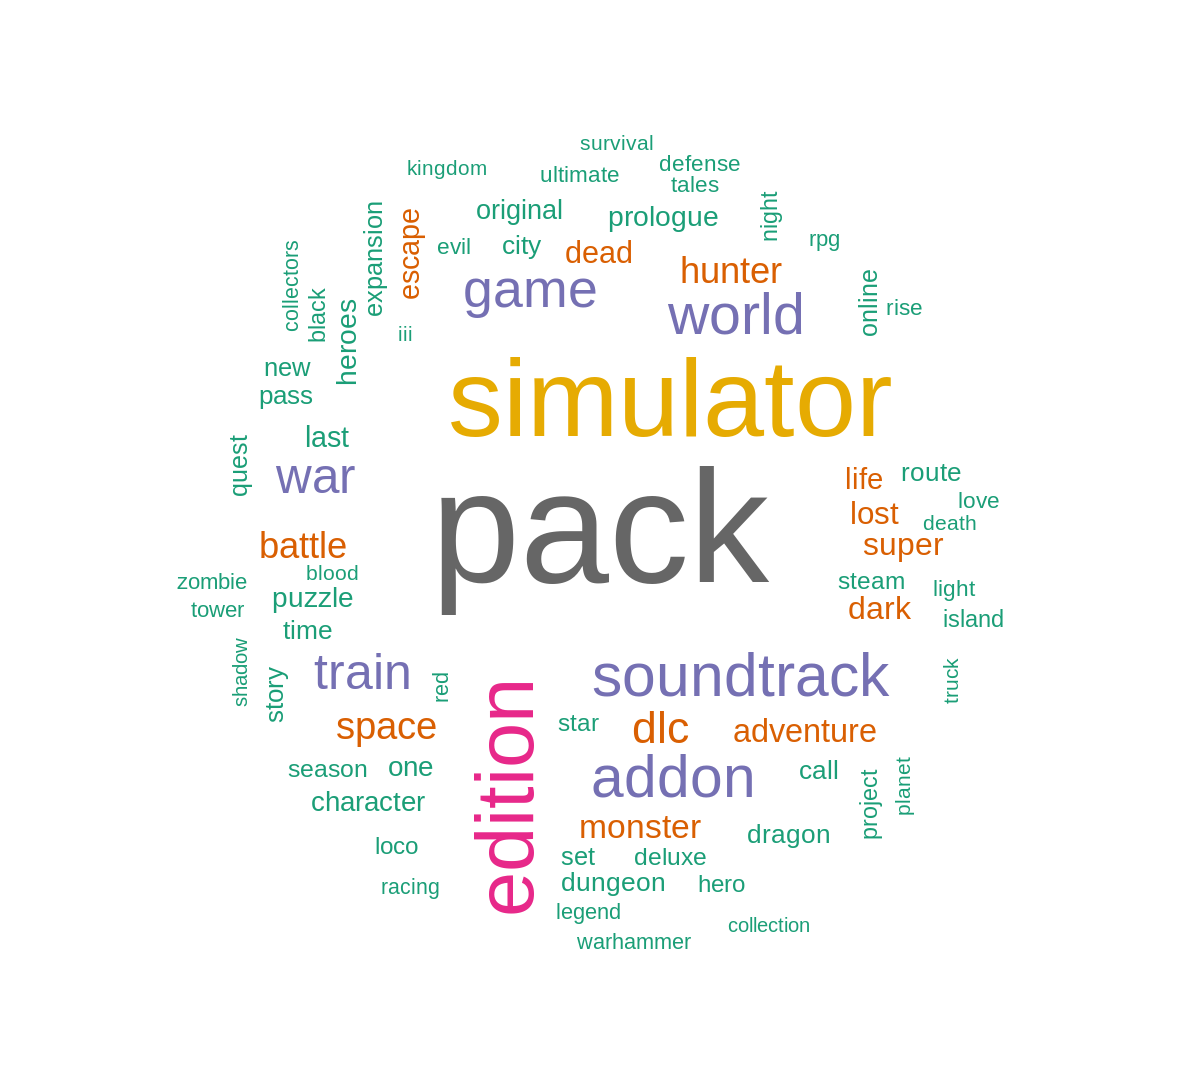

In [ ]:
options(repr.plot.width=10, repr.plot.height=9)

palabras <- VCorpus(VectorSource(title))
palabras <- tm_map(palabras, content_transformer(tolower))
palabras <- tm_map(palabras, removePunctuation)
palabras <- tm_map(palabras, removeWords, stopwords("english"))

colores = brewer.pal(8,"Dark2")

wordcloud(palabras, scale = c(8,0.5), random.order = FALSE,
max.words=75, rot.per=0.25, colors = colores)


- La nube de palabras es una representación visual que muestra las palabras más frecuentes en los títulos del conjunto de datos. Cada palabra en la nube de palabras representa un término que aparece en al menos uno de los títulos.

#### Matriz de Correlación

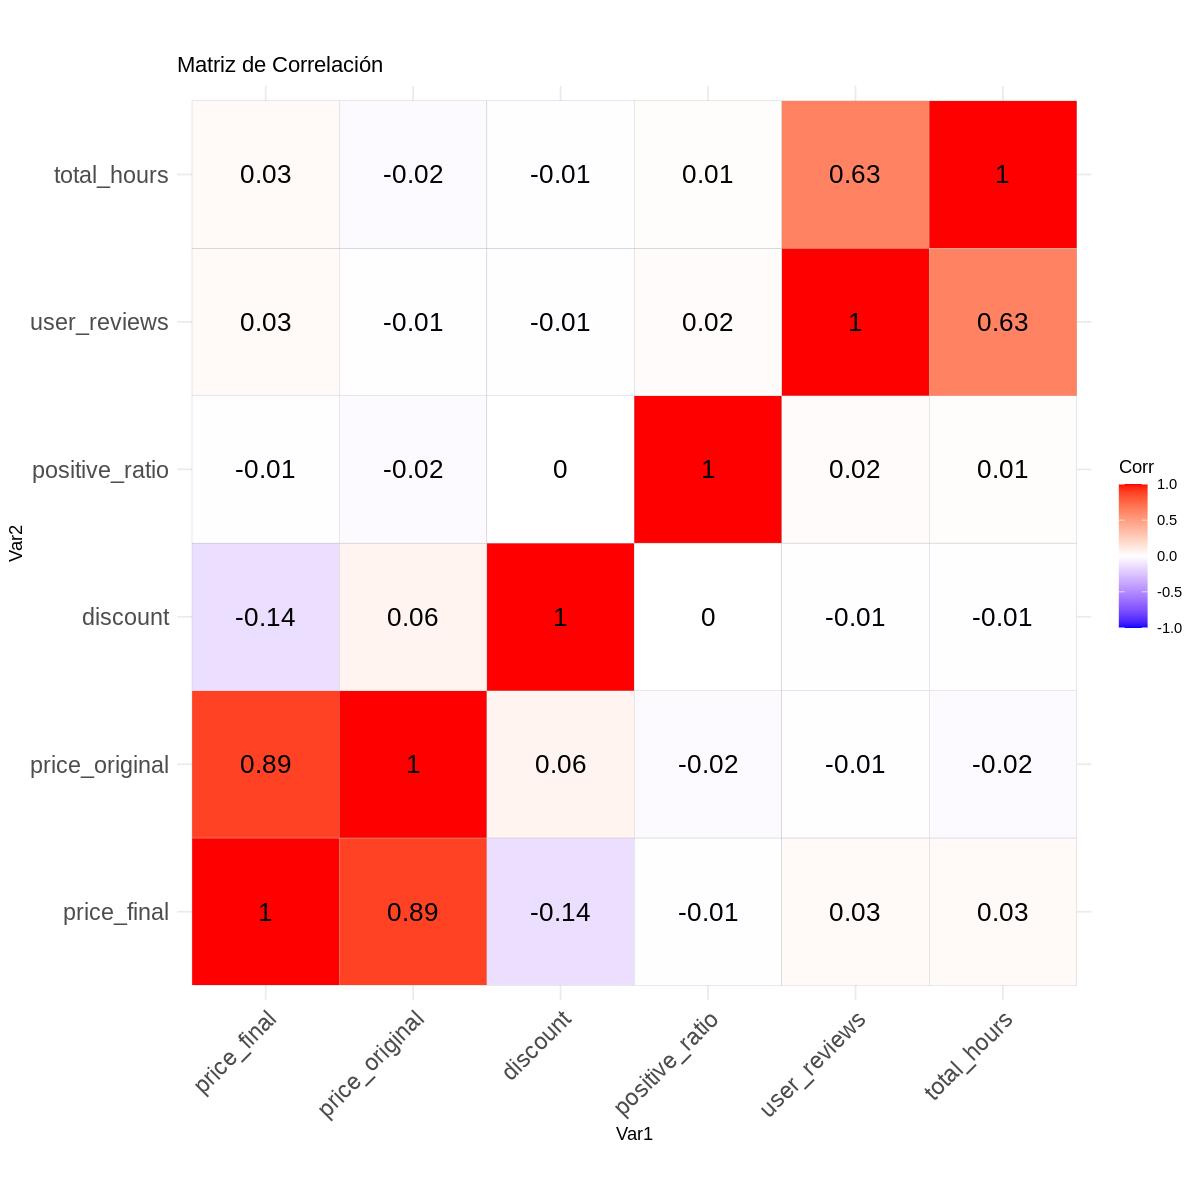

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

games_corr <- cor(data_numerica(), method ="pearson")
round_corr <- round(games_corr, digits=2)

ggcorrplot(round_corr, hc.order = TRUE, lab_size = 5.5, lab=TRUE)+
  ggtitle("Matriz de Correlación")+
  theme_minimal()+
  theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1), # Tamaño de la fuente en el eje x
       axis.text.y = element_text(size = 14))                         # Tamaño de la fuente en el eje y

- Exsite una correlación alta (0.89) entre las variables "price_final" y "price_original" esto indica una fuerte relación positiva entre ambos precios.

- En un modelo de predicción del precio final, sería apropiado excluir la variable "price_original" del modelo para evitar problemas de multicolinealidad debido a la alta correlación ya que sería redundante.

### Modelo de Recomendación

In [ ]:
recommendGame(570)

app_id,title
<int>,<chr>
238960,Path of Exile
1172470,Apex Legends™
261550,Mount & Blade II: Bannerlord
236850,Europa Universalis IV
359550,Tom Clancy's Rainbow Six® Siege


### Modelo de Series de Tiempo

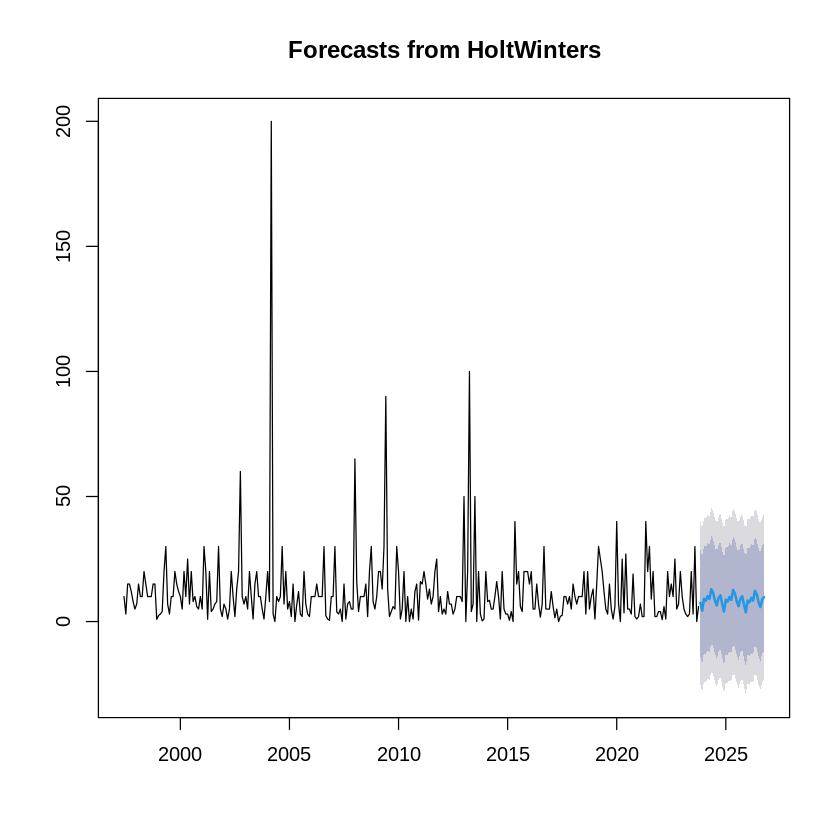

In [ ]:
# Creación de una serie de tiempo a partir del precio final de videojuegos y la fecha de lanzamiento
# start=c(1997,6) indica que la serie comienza en junio de 1997
# end=c(2023,10)  indica que la serie termina en octubre de 2023
# frequency=12    indica que los datos tienen una frecuencia mensual (12 observaciones por año)

serie <- ts(df$price_final, start=c(1997,6), end=c(2023,10), frequency=12)

# Se entrena el modelo Holt-Winters utilizando los datos de la serie
hw <- HoltWinters(serie)

# Predicción a 36 meses utilizando el modelo entrenado
model_forecast <- forecast(hw, h=36)

# Se crea un gráfico con la serie de tiempo original y las predicciones
plot(model_forecast)

##### Evaluación del rendimiento del modelo

In [ ]:
# División de los datos en conjunto de entrenamiento y prueba
train_data <- window(serie, start= c(1997,6),  end= c(2016,12))
test_data <- window(serie,  start= c(2017,1), end= c(2023,10))

# Se entrena el modelo con los datos de entrenamiento
hw_train <- HoltWinters(train_data)

# Se realiza la predicción para el conjunto de prueba
forecast_pred <- forecast(hw_train, h = length(test_data))


In [ ]:
# Cálculo de las métricas

#  forecast_pred$mean : Acceso a las predicciones
errors <- test_data - forecast_pred$mean

# MAE: Error Absoluto Medio, es la media del valor absoluto de los errores
mae <- mean(abs(errors))

# MSE: Error Cuadrático Medio, es la media de los errores al cuadrado
mse <- mean(errors^2)

# RMSE: Raíz del Error Cuadrático Medio, es la raíz cuadrada de la media de los errores al cuadrado
rmse <- sqrt(mse)

# Imprimir métricas
cat("Error Absoluto Medio (MAE):", mae, "\n")
cat("Error Cuadrático Medio (MSE):", mse, "\n")
cat("Raíz del Error Cuadrático Medio (RMSE):", rmse, "\n")

Error Absoluto Medio (MAE): 7.723476 
Error Cuadrático Medio (MSE): 92.44515 
Raíz del Error Cuadrático Medio (RMSE): 9.61484 


- Error Absoluto Medio (MAE) = 7.723476

 Este valor indica que, en promedio, las predicciones del modelo se desvían 7.723476 unidades del precio real. Es decir, las predicciones son, en promedio, 7.72 dolares más altas o más bajas que el precio real.
 Comparado con la media de price_final (8.620325), el MAE es ligeramente menor, lo cual es un buen indicador.

- Error Cuadrático Medio (MSE) = 92.44515

 Un MSE de 92.44515 indica que existe una variabilidad considerable. Comparado con la varianza de price_final (132.575973), el MSE no es excesivamente alto, pero aún así es un valor considerable.

- Raíz del Error Cuadrático Medio (RMSE) = 9.61484

 El RMSE tiene la misma unidad que los datos originales y su valor es de 9.61484 que indica que, en promedio, las predicciones del modelo se desvían 9.61484 unidades del precio real. Comparado con la desviación estándar de price_final (11.514164), el RMSE es ligeramente menor, lo cual es un buen indicador.